In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
import category_encoders as ce

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

from sklearn.tree import DecisionTreeRegressor

from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error



from sklearn.feature_selection import SelectPercentile, SelectKBest,f_regression, f_classif

from sklearn.pipeline import Pipeline


from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.impute import SimpleImputer, KNNImputer

from xgboost import XGBRegressor

#imbalance method
# from imblearn.over_sampling import RandomOverSampler, SMOTE
# from imblearn.under_sampling import RandomUnderSampler, NearMiss
# from imblearn.pipeline import Pipeline as ImbPipeline


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder, FunctionTransformer
import category_encoders as ce
import pickle

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import time

# Background
### Company Profile

Syarah adalah **platform e-commerce** yang dengan specialisasi dalam mempromosikan **penjualan mobil bekas** dan baru, membantu bisnis dan individu dalam membeli kendaraan mereka dengan mudah dan cepat.

Tujuan perusahaan ini adalah memberikan layanan berkualitas yang melebihi ekspektasi pelanggan.

### StakeHolder

- Platform E-Commerce (Syarah): Platform yang menghubungkan penjual dan pembeli, yang juga ingin **meningkatkan akurasi harga** untuk meningkatkan kepuasan pelanggan.

### Problem Statement

**Penentuan harga mobil bekas yang akurat adalah tantangan utama** bagi semua pihak yang terlibat di pasar mobil bekas. Harga yang terlalu tinggi dapat mengurangi minat pembeli, sementara harga yang terlalu rendah dapat merugikan penjual. Saat ini, penilaian harga mobil bekas sering kali dilakukan secara subjektif atau berdasarkan pengalaman, yang dapat menyebabkan variasi yang signifikan dan ketidakakuratan. Oleh karena itu, **diperlukan model prediksi harga mobil bekas** yang dapat mengintegrasikan berbagai faktor seperti merek, model, tahun pembuatan, jarak tempuh, kondisi kendaraan, dan lokasi penjualan untuk menghasilkan estimasi harga yang lebih tepat dan konsisten. Model ini akan membantu:

- Platform E-Commerce: Meningkatkan kepercayaan dan kepuasan pelanggan dengan **menyediakan estimasi harga yang akurat.**

Dengan demikian, tujuan utama dari pengembangan model prediksi harga mobil bekas adalah untuk **meningkatkan efisiensi dan akurasi penentuan harga** di pasar mobil bekas, serta mendukung keputusan yang lebih baik bagi semua pihak yang terlibat.

### Goals

- Membuat model yang dapat menghasilkan **estimasi harga mobil bekas yang efisien dan akurat**

### Analytic Approach

Berikut adalah langkah-langkah yang akan dilakukan dalam pembuatan model:

- Data Understanding : Pendalaman mengenai **data** yang akan digunakan
- Data Preprocessing : Process **pembersihan data** untuk memastikan data akurat, lengkap, dan konsisten
- Feature Engineering : **Pengolahan data mentah**, menjadi fitur yang dapat dibaca oleh model
- EDA :**Pendalaman data** yang telah diolah guna **meningkatkan kinerja model dan mengeliminasi redundancy**
- Modelling & Hyperparameter Tuning : **pembuatan dan pelatihan model**
- Evaluasi Model : **Menilaian Performa Model**

### Metric Evaluation

Evaluasi metrik yang akan digunakan adalah:
- RMSE : rataan **akar kuadrat dari error**, dimana error adalah selisih antar hasil prediksi dan harga asli
- MAE : rataan **nilai absolut dari error**
- MAPE : rataan **persentase error** yang dihasilkan oleh model regresi. 

Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi harga mobil bekas sesuai dengan limitasi fitur yang digunakan. 

## Data Understanding

Dataset berisi 5624 keterangan mobil bekas yang dikumpulkan dari syarah.com. Setiap baris mewakili sebuah mobil bekas. Informasi lain mengenai setiap mobil mencakup nama merek, model, tahun pembuatan, asal, opsi, kapasitas mesin, jenis transmisi, jarak tempuh yang telah dilalui mobil, harga regional, dan dapat dinegosiasikan.

| No. | Column Name    | Description                                                |
|----|----------------|------------------------------------------------------------|
| 1  | Type           | Type/Model mobil bekas                 |
| 2  | Region       | Wilayah Penjualan                     |
| 3  | Make     | Nama Manufaktur                        |
| 4  | Gear_Type       | Jenis Transmisi mobil(Manual/Automatic)       |
| 5  | Origin   | Asal Mobil Bekas                       |
| 6  | Options        | Opsi mobil, menandakan kelengkapan fitur tambahan(Full/Semi full/Standard)                          |
| 7  | Year           | Tahun pembuatan                            |
| 8  | Engine_Size         | Ukuran mesin mobil bekas                         |
| 9  | Mileage      | jarak tempuh mobil bekas                      |
| 10 | Negotiable       | Ketersediaan Penjual untuk menegosiasi harga                  |
| 11 | Price    | Harga Mobil Bekas                   |



# Load Dataset

In [3]:
# read dataset

df = pd.read_csv('data_saudi_used_cars.csv')

#import data

df

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0
...,...,...,...,...,...,...,...,...,...,...,...
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,True,0
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000
5622,RX,Dammam,Lexus,Automatic,Gulf Arabic,Full,2016,2.5,81000,False,154000


# Data Preprocessing

### Missing value

Memastikan Data set tidak memiliki **data yang Null/NaN**.

data Null perlu dihilangkan, dengan cara didrop atau diisi dengan imputasi, karena dapat **membuat bias yang tidak mewakili data sebenarnya**.

In [4]:
df.isna().sum()

Type           0
Region         0
Make           0
Gear_Type      0
Origin         0
Options        0
Year           0
Engine_Size    0
Mileage        0
Negotiable     0
Price          0
dtype: int64

**tidak ditemukan Missing value**, data lengkap

### Negative Value

Memastikan tidak terdapat **nilai negatif yang tidak masuk akal** dalam data.

tidak masuk akal jika **nilai negatif mustahil** terjadi, **dalam kasus ini semua kolom numeric tidak mungkin negatif**

nilai negatif perlu dihilangkan untuk memastikan **akurasi dan keandalan** data.

In [5]:
df.describe()

,Year,Engine_Size,Mileage,Price
count,5624.000000,5624.000000,5.624000e+03,5624.000000
mean,2014.101885,3.295430,1.509234e+05,53074.058144
std,5.791606,1.515108,3.828360e+05,70155.340614
min,1963.000000,1.000000,1.000000e+02,0.000000
25%,2012.000000,2.000000,3.800000e+04,0.000000
50%,2016.000000,3.000000,1.030000e+05,36500.000000
75%,2018.000000,4.500000,1.960000e+05,72932.500000
max,2022.000000,9.000000,2.000000e+07,850000.000000


**Tidak ditemukan nilai negatif**, namun ditemukan **harga mobil 0 dalam data**, akan didalami lebih lanjut.

### Duplicate Rows

Memastikan tidak ada **data duplikat**.

data duplikat ditandakan dengan adanya baris data yang **sama persis** dengan data sebelumnya.

Menghilangkan baris duplikat **mencegah distorsi** dalam analisis statistik dan **memastikan dataset secara akurat merepresentasikan populasi**.

Pertama perlu dicheck data yang unique, jika ditemukan kolom data yang jumlah unique=jumlah baris, akan mennyulitkan pencarian duplikate maka perlu di drop sementara 

In [6]:
df.nunique()

Type            347
Region           27
Make             58
Gear_Type         2
Origin            4
Options           3
Year             50
Engine_Size      71
Mileage        1716
Negotiable        2
Price           467
dtype: int64

In [7]:
df.select_dtypes(include='object').describe()

,Type,Region,Make,Gear_Type,Origin,Options
count,5624,5624,5624,5624,5624,5624
unique,347,27,58,2,4,3
top,Land Cruiser,Riyadh,Toyota,Automatic,Saudi,Full
freq,269,2272,1431,4875,4188,2233


tidak ditemukan data yang unique mutlak,dimana jumlah unique value = jumlah data, maka dapat langsung di check dengan df.duplicated()

In [8]:
df.duplicated().sum()

4

In [9]:
df[df.duplicated(keep=False)]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
236,Sonata,Jeddah,Hyundai,Automatic,Saudi,Standard,2020,2.4,100,False,72910
540,Rio,Riyadh,Kia,Automatic,Saudi,Standard,2016,1.4,270000,False,25000
953,Rio,Riyadh,Kia,Automatic,Saudi,Standard,2016,1.4,270000,False,25000
2012,Tucson,Dammam,Hyundai,Automatic,Saudi,Standard,2016,2.0,155000,False,45000
3631,Camry,Riyadh,Toyota,Automatic,Saudi,Full,2013,2.5,185000,True,0
4646,Sonata,Jeddah,Hyundai,Automatic,Saudi,Standard,2020,2.4,100,False,72910
4933,Tucson,Dammam,Hyundai,Automatic,Saudi,Standard,2016,2.0,155000,False,45000
5267,Camry,Riyadh,Toyota,Automatic,Saudi,Full,2013,2.5,185000,True,0


In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

ditemukan 4 pasang data duplicate, dilakukan pembersihan data dengan cara didrop semua data kecuali 1 dari tiap pasang 

### 0 price & Negotiable Column

Pendalaman lebih lanjut dari anomali data mobil bekas dengan harga 0

In [12]:
df[df['Price']==0]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0
9,LS,Aseer,Lexus,Automatic,Saudi,Full,1998,4.6,300,True,0
14,Hilux,Yanbu,Toyota,Automatic,Saudi,Full,2014,2.7,209,True,0
15,Land Cruiser,Aseer,Toyota,Manual,Gulf Arabic,Semi Full,1982,4.6,340000,True,0
...,...,...,...,...,...,...,...,...,...,...,...
5610,Town Car,Jeddah,Lincoln,Automatic,Other,Full,1999,5.0,343,True,0
5614,Victoria,Makkah,Ford,Automatic,Saudi,Standard,2010,4.6,345000,True,0
5617,Yukon,Jubail,GMC,Automatic,Saudi,Semi Full,2006,5.3,300,True,0
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,True,0


In [13]:
df[(df['Price']==0) & (df['Negotiable']==False)]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
3168,Furniture,Riyadh,Toyota,Automatic,Other,Semi Full,2012,2.7,225000,False,0


setelah dilihat kembali, ditemukan bahwa hampir semua data dengan **harga 0 memperbolehkan negosiasi harga** dengan penjual,

maka harga dicantum sebagai 0 masih masuk akal, namun karena **tidak merepresentasi harga asli**, baris dengan harga 0 perlu **didrop dari dataset**.

In [14]:
df=df[df['Price']>0]

In [15]:
df['Negotiable'].unique()

array([False])

In [16]:
df[df['Negotiable']==True]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price


setelah data dengan harga 0 di drop, kolom **negotiable hanya memiliki 1 unique value**, yaitu false. 

maka kolom sudah dianggap **irrelevenant**, kolom akan didrop.

In [17]:
df.drop(columns=['Negotiable'], inplace=True)

C:\Users\RavliKahfi\AppData\Local\Temp\ipykernel_14396\2952818298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Negotiable'], inplace=True)


### Outlier

Memastikan tidak ada Outlier, **data yang jauh dari pola tren data**

karena outlier ini cenderung memiliki bobot yang jauh lebih berat ke salah satu arah(terlalu besar/terlalu kecil dibanding data lain)

mereka dapat secara **tidak proporsional** mempengaruhi ukuran statistik dan hasil pemodelan, yang berpotensi **menghasilkan wawasan yang menyesatkan**.

oleh karena itu outlier perlu dihilangkan.

In [18]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR= Q3-Q1
lwrBnd=Q1-(1.5*IQR)
uprBnd=Q3+(1.5*IQR)
outlier=df[(df['Price'] < lwrBnd) | (df['Price'] > uprBnd)]
outlier[outlier['Price']>uprBnd]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,260000
17,Land Cruiser,Riyadh,Toyota,Automatic,Saudi,Full,2019,4.6,71000,200000
60,SL,Jeddah,Mercedes,Automatic,Saudi,Full,2017,4.7,81000,265000
73,Land Cruiser,Qassim,Toyota,Automatic,Saudi,Full,2019,4.5,82808,230000
74,GLC,Dammam,Mercedes,Automatic,Gulf Arabic,Full,2020,2.0,4000,225000
...,...,...,...,...,...,...,...,...,...,...
5530,The 7,Jeddah,BMW,Automatic,Saudi,Full,2019,3.0,14000,247000
5548,The M,Riyadh,BMW,Automatic,Saudi,Full,2020,6.0,13000,385000
5555,S8,Dammam,Audi,Automatic,Gulf Arabic,Full,2016,4.0,42000,229000
5573,S,Jeddah,Mercedes,Automatic,Saudi,Semi Full,2015,4.0,157000,215000


In [19]:
uprBnd

183125.0

In [20]:
outlier[outlier['Price']<lwrBnd]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price


ditemukan 259 baris dengan harga outlier diatas upperbound, maka akan didrop

tidak ada harga dibawah lowerbound 

In [21]:
df=df[(df['Price'] >= lwrBnd) & (df['Price'] <= uprBnd)]

In [22]:
Q1 = df['Mileage'].quantile(0.25)
Q3 = df['Mileage'].quantile(0.75)
IQR= Q3-Q1
lwrBnd=Q1-(1.5*IQR)
uprBnd=Q3+(1.5*IQR)
outlier=df[(df['Mileage'] < lwrBnd) | (df['Mileage'] > uprBnd)]
outlier[outlier['Mileage']>uprBnd]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
28,Pathfinder,Al-Ahsa,Nissan,Automatic,Saudi,Semi Full,2002,3.3,550000,10000
62,SEL,Tabouk,Mercedes,Automatic,Saudi,Full,1986,3.0,500000,5500
110,Optra,Riyadh,Chevrolet,Automatic,Saudi,Standard,2007,1.6,2000000,5000
117,Furniture,Taef,Toyota,Manual,Saudi,Standard,2009,2.7,530500,33000
174,Durango,Yanbu,Dodge,Automatic,Saudi,Semi Full,2013,5.7,487100,35000
...,...,...,...,...,...,...,...,...,...,...
5520,Corolla,Dammam,Toyota,Manual,Saudi,Semi Full,2001,1.3,600000,10000
5543,Edge,Qassim,Ford,Automatic,Saudi,Full,2012,3.5,395000,35000
5554,Camry,Al-Medina,Toyota,Automatic,Saudi,Full,2007,2.5,420000,25000
5595,Land Cruiser,Dammam,Toyota,Manual,Saudi,Standard,2007,4.5,480000,65000


In [23]:
outlier[outlier['Mileage']< lwrBnd]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price


In [24]:
df=df[(df['Mileage'] >= lwrBnd) & (df['Mileage'] <= uprBnd)]

ditemukan 120 baris dengan Milage outlier diatas upperbound, maka akan didrop

tidak ada Mileage dibawah lowerbound 

In [25]:
df

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,120000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,42000
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,58000
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,85000
7,Sonata,Riyadh,Hyundai,Automatic,Saudi,Full,2016,2.4,155,48000
...,...,...,...,...,...,...,...,...,...,...
5616,CX9,Qassim,Mazda,Automatic,Saudi,Full,2020,2.0,9500,132000
5618,Suburban,Riyadh,GMC,Automatic,Saudi,Full,2006,5.3,86000,50000
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,68000
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,145000


# Feature Engineering

### Rule Based Price Prediction
Pembuatan Kolom RBPP(Rule Based Price Prediction), kolom ini akan jadi pembanding dengan hasil prediksi model

prediksi sederhana dengan mengambil rata-rata harga berdasarkan type mobil

In [26]:
df1=df.groupby('Type')['Price'].mean()
df['RBPP']=df['Type'].map(df1)

### data Splitting

Dilakukan sebelum pembuatan dan pelatihan model, data di bagi menjadi dataset train dan test. 

dataset train akan digunakan untuk fitting/melatih model sedangkan dataset test digunakan dalam evaluasi performa model.

In [27]:
X=df.drop(['Price','RBPP'],axis=1)
y=df['Price']

In [28]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3,random_state=42)

### Normality test

Normality test, dilakukan untuk melihat kondisi distribusi data. dilakukan kepada kolom numerik untuk **pemilihan scaler yang akan di pakai di preprocessing**

In [29]:
from scipy.stats import normaltest

# Apply normaltest to each column and collect the p-values
normality_results = X_train.select_dtypes(include='number').apply(lambda col: normaltest(col.dropna())[1]).reset_index()

# Rename columns
normality_results.columns = ['Column', 'p-value']

# Print the result
normality_results

,Column,p-value
0,Year,0.000000e+00
1,Engine_Size,6.946418e-49
2,Mileage,2.097331e-38


In [30]:

normality_results
normality_results[normality_results['p-value']<=0.05]['Column'].unique()

# normality_results[normality_results['p-value']>0.05]['Column'].unique()

array(['Year', 'Engine_Size', 'Mileage'], dtype=object)

semua kolom numeric **tidak terdistribusi normal** maka menggunakan **robustscaler**

In [31]:
X_train

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage
3360,FX,Jeddah,INFINITI,Automatic,Gulf Arabic,Full,2012,5.3,235000
1709,Caprice,Riyadh,Chevrolet,Automatic,Saudi,Standard,2014,6.0,35481
5323,Corolla,Riyadh,Toyota,Manual,Saudi,Standard,2014,2.0,276
3458,Datsun,Riyadh,Nissan,Automatic,Saudi,Semi Full,2016,2.7,109766
2613,Optima,Tabouk,Kia,Automatic,Unknown,Semi Full,2018,2.4,125000
...,...,...,...,...,...,...,...,...,...
1767,Sonata,Riyadh,Hyundai,Automatic,Saudi,Semi Full,2018,2.4,78000
1822,Durango,Riyadh,Dodge,Automatic,Other,Semi Full,2012,5.7,315
2086,Impala,Dammam,Chevrolet,Automatic,Saudi,Standard,2016,3.5,91000
1383,Camry,Riyadh,Toyota,Automatic,Saudi,Semi Full,2017,2.4,190000


### Scaling Encoding


**scaling numerik** menggunakan **robustScaler** karena **data tidak terdistribusi normal**

**onehot encoder** digunakan pada kolom **gear_type** dan **origin** karena **tidak ordinal** dan **jumlah unique value sedikit**

**ordinal encoder** digunakan pada kolom **options** karena **ordinal(memiliki tingkatan)**.

**Target encoder** digunakan pada kolom **type**, **make**, dan **region** karena **tidak ordinal** dan **jumlah unique value banyak**

In [32]:
# Preprocessor definition
categories = ['Standard', 'Semi Full', 'Full']
preprocessor = ColumnTransformer(
    transformers=[
        ('Numerical', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', RobustScaler())
        ]), ['Year', 'Engine_Size', 'Mileage']),
        ('Categorical 1', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(drop='first',handle_unknown='ignore'))
        ]), ['Gear_Type','Origin']),
        ('Categorical 2', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('encoder', OrdinalEncoder(categories=[categories]))
        ]), ['Options']),
        ('Categorical 3', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('encoder', ce.TargetEncoder())
        ]), ['Type','Make','Region'])
    ]
)

Fit transform X-train untuk memodifikasi data

In [33]:
X_train_transformed=preprocessor.fit_transform(X_train,y_train)

pengambilan nama kolom untuk membuat dataframe baru

In [34]:
numerical_columns = preprocessor.transformers_[0][2]
categorical_1_columns = preprocessor.transformers_[1][1]['encoder'].get_feature_names_out(input_features=preprocessor.transformers_[1][2])
categorical_2_columns = preprocessor.transformers_[2][1]['encoder'].get_feature_names_out(input_features=preprocessor.transformers_[2][2])
categorical_3_columns = preprocessor.transformers_[3][1]['encoder'].get_feature_names_out(input_features=preprocessor.transformers_[3][2])
all_columns = list(numerical_columns) + list(categorical_1_columns) + list(categorical_2_columns) +['Type','Make','Region']

In [35]:
X_train_transformed=pd.DataFrame(X_train_transformed, columns=all_columns)

In [36]:
X_train_transformed

,Year,Engine_Size,Mileage,Gear_Type_Manual,Origin_Other,Origin_Saudi,Origin_Unknown,Options,Type,Make,Region
0,-1.00,1.30,1.016946,0.0,0.0,0.0,0.0,2.0,62898.415073,68286.062730,60694.463889
1,-0.50,1.65,-0.554948,0.0,0.0,1.0,0.0,0.0,56304.587897,67187.035283,65188.252769
2,-0.50,-0.35,-0.832308,1.0,0.0,1.0,0.0,0.0,40726.155163,70834.890710,65188.252769
3,0.00,0.00,0.030300,0.0,0.0,1.0,0.0,1.0,50856.185437,47387.199359,65188.252769
4,0.50,-0.15,0.150320,0.0,0.0,0.0,1.0,1.0,49884.475330,41177.075969,56921.928924
...,...,...,...,...,...,...,...,...,...,...,...
2406,0.50,-0.15,-0.219965,0.0,0.0,1.0,0.0,1.0,51413.796704,45370.501377,65188.252769
2407,-1.00,1.50,-0.832001,0.0,1.0,0.0,0.0,1.0,58769.452527,67753.759872,65188.252769
2408,0.00,0.40,-0.117546,0.0,0.0,1.0,0.0,0.0,63690.855662,67187.035283,71835.560345
2409,0.25,-0.15,0.662418,0.0,0.0,1.0,0.0,1.0,52112.465686,70834.890710,65188.252769


## Feature Selection

### Multicolinearity

Multicolinearity adalah kondisi dalam analisis di mana **dua atau lebih fitur memiliki hubungan linear yang sangat kuat** satu sama lain.

kondisi ini dapat **menghasilkan masalah dalam pembuatan mode**l, terutama adalah **Redundancy** dimana Variabel yang **mengukur konsep yang sama** atau serupa. 

karena mereka mengukur konsep yang sama, **model hanya perlu melihat ke 1 fitur** dari tiap kelompok multicolinear, 

dan **fitur-fitur lain dapat diabaikan** tanpa adanya kehilangan informasi

Highly correlated feature groups:
['Year', 'Year']
['Engine_Size', 'Engine_Size']
['Mileage', 'Mileage']
['Gear_Type_Manual', 'Gear_Type_Manual']
['Origin_Other', 'Origin_Other']
['Origin_Saudi', 'Origin_Saudi']
['Origin_Unknown', 'Origin_Unknown']
['Options', 'Options']
['Type', 'Make', 'Type']
['Region', 'Region']


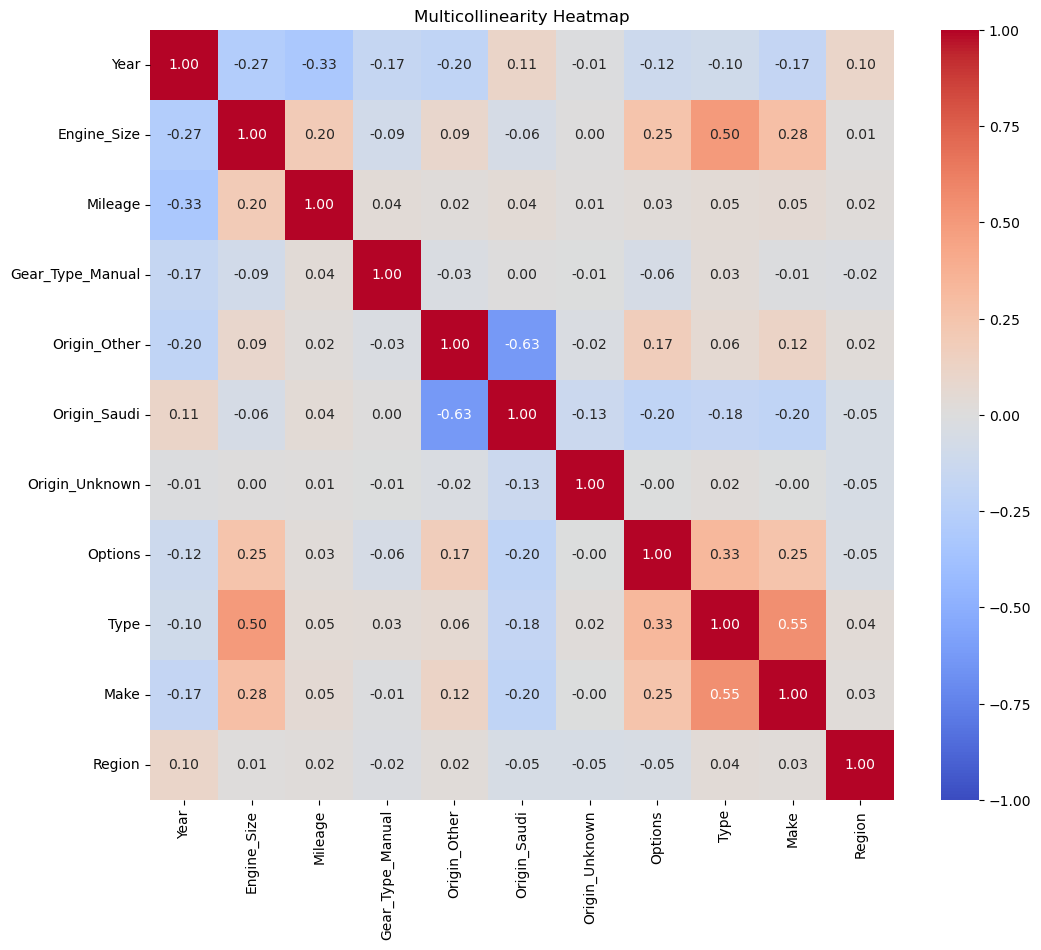

In [37]:
# Select numerical columns
dfcorr = X_train_transformed.select_dtypes(include='number')

# Compute correlation matrix
corrMatrix = dfcorr.corr()

# Identify highly correlated features
threshold = 0.5
already_in = set()
result = []
for col in corrMatrix:
    large_corr = corrMatrix[col][corrMatrix[col] > threshold].index.tolist()
    if large_corr and col not in already_in:
        already_in.update(set(large_corr))
        large_corr.append(col)
        result.append(large_corr)

print("Highly correlated feature groups:")
for group in result:
    print(group)

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the full heatmap
sns.heatmap(corrMatrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)

# Set titles and labels
plt.title('Multicollinearity Heatmap')
plt.show()

In [38]:
dfcorr=X_train_transformed.select_dtypes(include='number')
corrMatrix=dfcorr.corr()
already_in = set()
result = []
for col in corrMatrix:
    large_corr = corrMatrix[col][corrMatrix[col] > 0.5 ].index.tolist()
    if large_corr and col not in already_in:
        already_in.update(set(large_corr))
        large_corr.append(col)
        result.append(large_corr)

result



[['Year', 'Year'],
 ['Engine_Size', 'Engine_Size'],
 ['Mileage', 'Mileage'],
 ['Gear_Type_Manual', 'Gear_Type_Manual'],
 ['Origin_Other', 'Origin_Other'],
 ['Origin_Saudi', 'Origin_Saudi'],
 ['Origin_Unknown', 'Origin_Unknown'],
 ['Options', 'Options'],
 ['Type', 'Make', 'Type'],
 ['Region', 'Region']]

In [39]:
list(pd.DataFrame(result)[2].unique())

[None, 'Type']

dari visualisasi ditemukan bahwa **kolom Type, multicolinear dengan kolom make**

dianggap **redundant**, dan 1 kolom dapat diabaikan.



selain itu **origin_other** dan **origin_saudi**, juga ditemukan sebagai **multicolinear**.

namun **multicolinear** terjadi karena kedua kolom adalah **hasil onehot encoder dari kolom kategorikal origin**,

jika satu kolom di buang ada **resiko kehilangan informasi** yang dibutuhkan

maka kedua **kolom tetap dipertahankan**

In [40]:
X_train_transformed.drop(['Type'],axis=1,inplace=True)

### Feature Importance

Feature Importance merupakan teknik dalam pembuatan model yang digunakan untuk menentukan Besar kontribusi setiap fitur  terhadap prediksi model

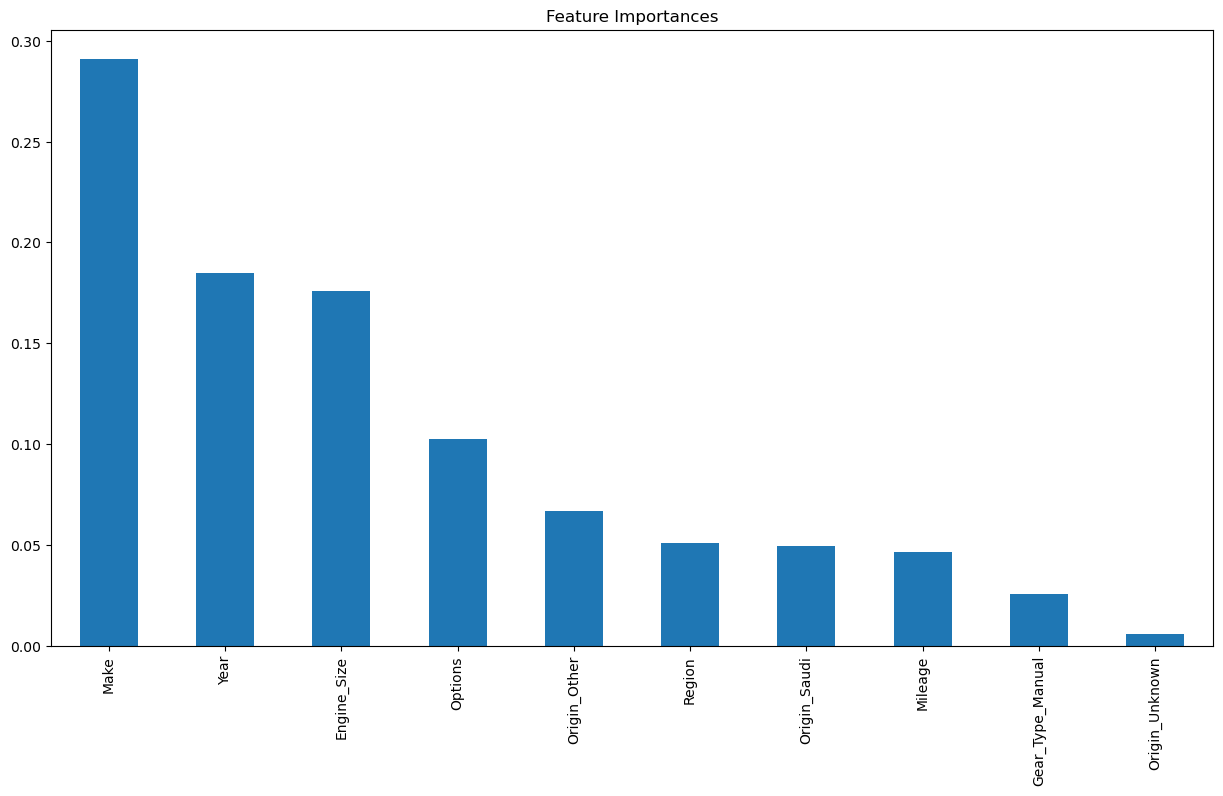

In [41]:
xgb=XGBRegressor()
xgb.fit(X_train_transformed,y_train)
xgb_coef1 = pd.Series(xgb.feature_importances_, X_train_transformed.columns).sort_values(ascending = False)
plt.figure(figsize=(15,8))
xgb_coef1.iloc[:50].plot(kind='bar', title='Feature Importances')
plt.show()

In [42]:
feat_imp=pd.DataFrame(xgb_coef1)
feat_imp[feat_imp[0]>0.1]

,0
Make,0.290849
Year,0.185063
Engine_Size,0.175714
Options,0.102668


In [43]:
feat_imp[feat_imp[0]>0.01].reset_index()['index'].unique()

array(['Make', 'Year', 'Engine_Size', 'Options', 'Origin_Other', 'Region',
       'Origin_Saudi', 'Mileage', 'Gear_Type_Manual'], dtype=object)

melihat dari Visualisasi diatas, diantara masing-masing kolom **Make_encoded**, **Engine_Size**, **Year**, dan **Options** memiliki kontribusi paling besar diantara semua kolom

In [44]:
df.select_dtypes(include='object').describe()

,Type,Region,Make,Gear_Type,Origin,Options
count,3445,3445,3445,3445,3445,3445
unique,304,27,54,2,4,3
top,Accent,Riyadh,Toyota,Automatic,Saudi,Standard
freq,146,1448,788,3087,2653,1273


## Modelling & Hyperparameter Tuning

dalam pembuatan menggunakan 3 fungsi utama yaitu:

- **Pipeline**: alat yang **memudahkan pengelolaan alur kerja pemrosesan data dan pelatihan model** secara berurutan.
- **SelectKBest**: fungsi yang digunakan untuk **pemilihan fitur** yang memilih fitur terbaik berdasarkan skor penilaian statistik tertentu. dalam kasus ini metric penilaian menggunakan **f_regression**, berhubung model prediksi yang dilatih adalah prediksi regresi
- **GridSearchCV**: module yang diggunakan untuk **Hyperparameter Tuning**, dengan menemukan **kombinasi hyperparameter terbaik untuk model** dengan melakukan **pencarian grid (grid search)** melalui **berbagai kombinasi hyperparameter yang ditentukan**. model terbaik ditentukan berdasarkan skor penilaian tertentu. dalam kasus ini metric penilaian menggunakan **neg_mean_absolute_error**, berhubung model prediksi yang dilatih adalah prediksi regresi

Pembaharuan preprocessor untuk mengabaikan fitur yang redundant

In [45]:
# Preprocessor definition
categories = ['Standard', 'Semi Full', 'Full']
preprocessor = ColumnTransformer(
    transformers=[
        ('Numerical', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', RobustScaler())
        ]), ['Year', 'Engine_Size', 'Mileage']),
        ('Categorical 1', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(drop='first',handle_unknown='ignore'))
        ]), ['Gear_Type','Origin']),
        ('Categorical 2', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('encoder', OrdinalEncoder(categories=[categories]))
        ]), ['Options']),
        ('Categorical 3', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('encoder', ce.TargetEncoder())
        ]), ['Make','Region'])
    ]
)

In [46]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3,random_state=42)
X_train.drop(['Type'],axis=1,inplace=True)

In [47]:


# Define the pipeline without classifier
pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('feature_selection', SelectKBest(score_func=f_regression)),
    ('classifier', DecisionTreeRegressor())  # Placeholder for classifier
])

# Parameter grid definition
param_grid = [
    {
        'feature_selection__k': [5, 10],
        'classifier': [DecisionTreeRegressor()],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5],
        'classifier__min_samples_leaf': [1, 4]
    },
    {
        'feature_selection__k': [5, 10],
        'classifier': [RandomForestRegressor()],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5],
        'classifier__min_samples_leaf': [1, 4]
    },
    {
        'feature_selection__k': [5, 10],
        'classifier': [GradientBoostingRegressor()],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__max_depth': [3, 5, 7]
    },
    {
        'feature_selection__k': [5, 10],
        'classifier': [XGBRegressor()],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [10, 20],
        'classifier__learning_rate': [0.01, 0.1],
        'classifier__subsample': [0.6, 0.8]
    }
]

# Create GridSearchCV with the pipeline
gscv = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Measure the fitting time
start_time = time.time()

# Fit GridSearchCV to data
gscv.fit(X_train, y_train)

end_time = time.time()

fitting_time = end_time - start_time
print(f"Fitting time: {fitting_time:.2f} seconds")

Fitting time: 95.32 seconds


In [48]:
gscv.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Year', 'Engine_Size',
                                                   'Mileage']),
                                                 ('Categorical 1',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),...
                                                                                               'Full',
                                                                                               'Full']]))]),
                                                  ['Options']),
                                                 ('Categorical 3',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   TargetEncoder())]),
                                                  ['Make', 'Region'])])),
                ('feature_selection',
                 SelectKBest(k=5,
                             score_func=<function f_regression at 0x00000109D2D9FD80>)),
                ('classifier',
                 GradientBoostingRegressor(learning_rate=0.2,
                                           n_estimators=200))])

In [55]:
selected_features_mask = gscv.best_estimator_.named_steps['feature_selection'].get_support()
selected_features = X_train_transformed.columns[selected_features_mask]
print("Selected features by SelectKBest:")
print(selected_features)

Selected features by SelectKBest:
Index(['Year', 'Engine_Size', 'Mileage', 'Options', 'Make'], dtype='object')


dengan menggunakan fungsi **best_estimator_** dari module **gridsearchCV**, dapat dilihat **process yang pengolahan data**, dan **hasil pemilihan fitur** dan **model** yang terbaik.

**SelectKbest** Menentukan berdasarkan penilaian **F_regression** bahwa K=5 atau **5 fitur adalah jumlah fitur yang paling optimal** yang diperlukan oleh model,

dan dengan menggunakan **get_support()**, menampilkan **fitur yang terpilih** yaitu **'Year'**, **'Engine_Size'**, **'Mileage'**, **'Options'**, dan *'Make'*

**GridsearchCV** memilih **GradientBoostingRegressor** sebagai **model prediksi terbaik**, dengan **hyperparamater Learning_rate=0.2** dan **N_estimator=200**

**GradientBoostingRegressor** adalah teknik ensemble yang bekerja dengan cara membangun **model secara bertahap**, 
di mana **setiap model baru mencoba memperbaiki kesalahan** yang dibuat oleh model sebelumnya.

**Tahap-tahap pembuatan model** sebagai berikut

1. **Inisialisasi Model**:

- **Model pertama** yang dibangun adalah **model yang sangat sederhana**. Biasanya, model pertama adalah model yang hanya memprediksi nilai rata-rata dari target (y).
2. Iterasi Pembelajaran:

- Dalam **setiap iterasi**, **model keputusan baru** (Decision Tree) **ditambahkan** untuk **memperbaiki kesalahan yang dibuat oleh model yang sudah ada**.
- **Kesalahan diukur dengan menghitung residu**, yaitu **selisih antara nilai aktual** dan **nilai yang diprediksi** oleh model yang ada.
- **Model ini ditambahkan ke model yang ada** dengan **pembobotan yang diatur oleh parameter learning rate**.
4. Menggabungkan Model:

- **Model akhir** adalah **kombinasi dari semua model** yang dibangun pada setiap iterasi. 


Parameter GradientBoostingRegressor

- n_estimators: **Jumlah Model Decision Tree** yang akan dibangun.
- learning_rate: **Kontrol seberapa besar kontribusi setiap Tree terhadap model akhir**. Nilai yang lebih kecil biasanya membutuhkan lebih banyak pohon untuk mencapai hasil yang baik.
- max_depth: **Kedalaman maksimum setiap Decision Tree**. Nilai yang lebih dalam memungkinkan model menangkap lebih banyak kompleksitas, tetapi juga meningkatkan risiko overfitting.

GridSearchCV hanya mencantum 2 dari 3 paramater utama, jika paremater tidak tercantum model menggunakan nilai default untuk parameter tersebut.

In [ ]:
from sklearn.metrics import mean_absolute_error

# Evaluasi Model

Setelah model sudah dilatih dan dituning, tahap selanjutnya adalah **evaluasi model**.

dalam tahap ini model akan menggunakan **fitur dari dataset test(X_test)** yang didapat dari data splitting diatas, untuk **memprediksikan harga mobil bekas**

dari sini dapat **dibandingkan prediksi harga(y_pred) dengan harga asli(y_test)**, untuk menghasilkan **nilai evaluasi**. 

Dalam kasus ini, **metrik penilaian** digunakan adalah **Root Mean Squared Error (RMSE)**, **Mean Absolute Error (MAE)**, dan **Mean Absolute Persentage Error(MAPE)**.

### Preprocessing X_Test

In [ ]:

y_pred=gscv.best_estimator_.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("RMSE (scikit-learn):", rmse)
print("MAE (scikit-learn):", mae)
print("MAPE (scikit-learn):", mape)

RMSE (scikit-learn): 21101.381492640907
MAE (scikit-learn): 13235.541022393096
MAPE (scikit-learn): 0.9855538541152474


Hasil evaluasi ini akan dibandingkan dengan evaluasi prediksi harga mobil berdasarkan pendekatan rule base yang telah dibuat diatas

In [ ]:
rmse = np.sqrt(mean_squared_error(df['Price'], df['RBPP']))
mae = mean_absolute_error(df['Price'], df['RBPP'])
mape = mean_absolute_percentage_error(df['Price'], df['RBPP'])
print("RMSE (scikit-learn):", rmse)
print("MAE (scikit-learn):", mae)
print("MAPE (scikit-learn):", mape)

RMSE (scikit-learn): 27638.992506661678
MAE (scikit-learn): 19463.82738056422
MAPE (scikit-learn): 24.84799619613026


### Insight dari perbandingan
Perbandingan antara model  GradientBoostingRegressor dan rule-based prediction menunjukkan bahwa model  GradientBoostingRegressor memiliki kinerja yang jauh lebih baik daripada pendekatan rule-based. Berikut adalah interpretasi dari metrik error yang diberikan:

- RMSE (Root Mean Squared Error): Metrik ini mengukur **akar kuadrat dari rata-rata kesalahan kuadrat**. **Nilai RMSE yang lebih rendah menunjukkan bahwa prediksi model lebih dekat dengan nilai aktual**. **Model  GradientBoostingRegressor memiliki nilai RMSE yang lebih rendah** (21101.38) dibandingkan dengan rule-based (27638.99), yang menunjukkan bahwa model  **GradientBoostingRegressor lebih akurat**.

- MAE (Mean Absolute Error): Metrik ini mengukur **rata-rata kesalahan absolut**. MAE yang **lebih rendah menunjukkan bahwa rata-rata kesalahan prediksi lebih kecil**. **Model  GradientBoostingRegressor juga memiliki MAE yang h lebih rendah** (13235.54) dibandingkan dengan rule-based (19463.82), **menegaskan kembali keunggulan akurasi model  GradientBoostingRegressor**.

- MAPE (Mean Absolute Percentage Error): Metrik ini mengukur **rata-rata persentase kesalahan absolut**. **MAPE yang lebih rendah menunjukkan prediksi lebih baik dalam hal proporsi kesalahan**. Model  GradientBoostingRegressor memiliki MAPE  0.9855 (sekitar 98.55%), sedangkan rule-based memiliki MAPE 24.84 (sekitar 2484%), menunjukkan bahwa **model rule-based sangat tidak akurat dalam hal prediksi persentase.**

### Impact Penggunaan Model terhadap Bisnis Syarah.com
1. **Akurasi dan Keputusan yang Lebih Baik**:
Dengan menggunakan model  GradientBoostingRegressor yang lebih akurat, **penjual dapat membuat keputusan harga yang lebih tepat**. Ini penting untuk **menjaga keseimbangan antara daya tarik harga bagi pembeli dan profitabilitas penjual**. Harga yang terlalu tinggi dapat mengurangi kemungkinan terjadinya penjualan, sedangkan harga yang terlalu rendah dapat mengurangi margin keuntungan.

2. **Peningkatan Kepuasan Pelanggan**:
**Harga yang lebih akurat dan wajar meningkatkan kepuasan pelanggan, baik penjual dan pembeli**, karena **pelanggan akan merasa mendapatkan nilai yang adil** dalam melakukan transaksi. Ini dapat meningkatkan loyalitas pelanggan dan meningkatkan word-of-mouth positif.

3. **Efisiensi Operasional**:
Menggunakan model prediksi yang canggih seperti  GradientBoostingRegressor juga berarti bahwa **proses penentuan harga dapat menjadi lebih otomatis dan efisien**, mengurangi waktu dan tenaga yang dibutuhkan dibandingkan dengan metode rule-based yang mungkin lebih manual dan kurang adaptif terhadap perubahan pasar.

### Kesimpulan



Dari hasil evaluasi, jelas bahwa model GradientBoostingRegressor jauh lebih akurat dibandingkan dengan pendekatan rule-based. Mengadopsi model ini dalam bisnis akan memberikan berbagai manfaat termasuk peningkatan akurasi harga, efisiensi operasional, kepuasan pelanggan yang lebih tinggi, dan kemampuan untuk tetap kompetitif di pasar. Oleh karena itu, investasi dalam pengembangan dan penerapan model prediksi yang canggih seperti GradientBoostingRegressor sangat dianjurkan untuk memaksimalkan keuntungan dan keberlanjutan bisnis.

## Fit final model to all X

pelatihan ulang setelah menemukan model terbaik. kali ini model memiliki akses ke seluruh database, untuk memastikan model siap memprediksi dataset baru

In [ ]:
df

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price,RBPP
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,120000,82136.916667
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,42000,42319.285714
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,58000,57500.000000
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,85000,115000.000000
7,Sonata,Riyadh,Hyundai,Automatic,Saudi,Full,2016,2.4,155,48000,51092.596491
...,...,...,...,...,...,...,...,...,...,...,...
5616,CX9,Qassim,Mazda,Automatic,Saudi,Full,2020,2.0,9500,132000,85722.222222
5618,Suburban,Riyadh,GMC,Automatic,Saudi,Full,2006,5.3,86000,50000,67887.500000
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,68000,54750.000000
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,145000,82136.916667


In [ ]:

X=df.drop(['Price'],axis=1)
y=df['Price']



gscv.best_estimator_.fit(X,y)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Year', 'Engine_Size',
                                                   'Mileage']),
                                                 ('Categorical 1',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),...
                                                                                               'Full',
                                                                                               'Full']]))]),
                                                  ['Options']),
                                                 ('Categorical 3',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   TargetEncoder())]),
                                                  ['Make', 'Region'])])),
                ('feature_selection',
                 SelectKBest(k=5,
                             score_func=<function f_regression at 0x0000019BEFFDF880>)),
                ('classifier',
                 GradientBoostingRegressor(learning_rate=0.2,
                                           n_estimators=200))])

## Pickle

menyimpan model dalam bentuk file pickle/sav

In [ ]:
best_estimator = gscv.best_estimator_

# Save the best estimator to a .pkl file
with open('best_estimator.pkl', 'wb') as file:
    pickle.dump(best_estimator, file)

# Alternatively, save to a .sav file
with open('best_estimator.sav', 'wb') as file:
    pickle.dump(best_estimator, file)